In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import itertools
import os

from tqdm import tqdm
from thewalrus import perm

In [2]:
def sample_to_list(data_type, sample_str):
    match data_type:
        case 'Rubtsov_samples':
            return [int(i) for i in sample_str]
        
        case 'Rubtsov_check':
            sample = [int(i) for i in sample_str]
            if len(sample) < modes_num:
                sample = [0 for _ in range(modes_num - len(sample))] + sample
            return sample
        
        case 'Mazanik':
            return [int(i) for i in sample_str.strip("][").split(',')]
        
        case 'Mazanik_block':
            return [int(i) for i in sample_str.strip("][").split(',')]
        
        case 'SF':
            return [int(i) for i in sample_str.strip("][").split(' ')]

def calc_fock_basis(ph_num, modes_num):
    basis = []
    slots_num = ph_num + modes_num
    all_comb_bars = list(itertools.combinations(range(1, slots_num), modes_num - 1))
    for bars in all_comb_bars:
        bars = list(bars)
        bars.append(slots_num)
        bars.insert(0, 0)
        basis_vec = []
        for i in range(modes_num):
            basis_vec.append(bars[i+1] - bars[i] - 1)
        basis.append(basis_vec)

    return basis

def data_base_prob(data, all_samples, base_type, data_dir, disable_PB=False):
    match base_type:
        case 'None':
            for data_elem in data:
                data_elem['base_prob'] = 0
                
        case 'Rubtsov_samples':
            with open(os.path.join(data_dir, base_data_file_name), 'r') as f_data:
                for f_sample in tqdm(f_data, desc="Reading base data...", disable=disable_PB):
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Rubtsov_check':
            with open(os.path.join(data_dir, base_data_file_name), 'r') as f_data:
                for f_sample in tqdm(f_data, desc="Reading base data...", disable=disable_PB):
                    f_sample = f_sample.strip()
                    sample = f_sample.split('  ')[0] 
                    probability = f_sample.split('  ')[2] 
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Mazanik':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join(data_dir, base_data_file_name), 'r') as f_data:
                for f_sample in tqdm(f_data, desc="Reading base data...", disable=disable_PB):
                    sample = f_sample.strip()
                    sample = sample_to_list(base_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            base_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['base_prob'] = round(base_prob[i], 6)
            
        case 'SF':
            with open(os.path.join(data_dir, base_data_file_name), 'r') as f_data:
                for f_sample in tqdm(f_data, desc="Reading base data...", disable=disable_PB):
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Ground':
            with open(os.path.join(data_dir, base_data_file_name), 'r') as f_data:
                for f_sample in tqdm(f_data, desc="Reading base data...", disable=disable_PB):
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list('Mazanik', sample)
                    
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
    
    return data
    
def data_subject_prob(data, all_samples, subject_type, data_len=1000, data_dir='samples', disable_PB=False):
    match subject_type:
        case 'Mazanik_block':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join(data_dir, subject_data_file_name), 'r') as f_data:
                for _ in tqdm(range(data_len), desc="Reading subject data...", disable=disable_PB):
                    f_sample = f_data.readline()
                    f_sample = f_sample.strip()
                    sample = f_sample
                    sample = sample_to_list(subject_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            subject_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['subject_prob'] = round(subject_prob[i], 6)
            
        case 'Rubtsov_samples':
            with open(os.path.join(data_dir, subject_data_file_name), 'r') as f_data:
                for _ in tqdm(range(data_len), desc="Reading subject data...", disable=disable_PB):
                    f_sample = f_data.readline()
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(subject_type, sample)
                
                    data[all_samples.index(sample)]['subject_prob'] = round(float(probability), 6)           
        
        case 'Rubtsov_check':
            print(subject_type)
        
        case 'Mazanik':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join(data_dir, subject_data_file_name), 'r') as f_data:
                for _ in tqdm(range(data_len), desc="Reading subject data...", disable=disable_PB):
                    f_sample = f_data.readline()
                    sample = f_sample.strip()
                    sample = sample_to_list(subject_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            subject_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['subject_prob'] = round(subject_prob[i], 6)
            
            
        case 'SF':
            print(subject_type)
    
    return data
    

def define_data_list():
    all_samples = calc_fock_basis(photons_num, modes_num)

    data = [
        dict([
            ('sample', sample),
            ('base_prob', 0),
            ('subject_prob', 0)
        ]) for sample in all_samples
    ]
    
    return all_samples, data
    
def make_data_list(base_type, subject_type, data_len=1000, data_dir='samples', disable_PB=False):
    all_samples = []
    data = []
    if base_type != 'None':
        all_samples, data = define_data_list()
    else:
        with open(os.path.join(data_dir, subject_data_file_name), 'r') as f_data:
                for _ in tqdm(range(data_len), desc="Reading subject data...", disable=disable_PB):
                    f_sample = f_data.readline()
                    f_sample = f_sample.strip()
                    sample = sample_to_list(subject_type, f_sample)
                    if not(sample in all_samples):
                        all_samples.append(sample)
                        data.append(dict([
                            ('sample', sample),
                            ('base_prob', 0),
                            ('subject_prob', 0)
                        ]))
    
    
    data = data_base_prob(data, all_samples, base_type, data_dir, disable_PB)
    data = data_subject_prob(data, all_samples, subject_type, data_len, data_dir, disable_PB)
    
    return data

# Data Sources

Set the type of data to be read according to the Sampler being used. 

Options: 'Rubtsov_samples', 'Rubtsov_check', 'Mazanik', 'SF', 'Mazanik_block' or 'None'

In [12]:
subject_type = 'Mazanik_block'
base_type = 'Mazanik'

subject_data_file_name = 'block_sample_01.txt'
base_data_file_name = 'sample.txt'

photons_num = 6
modes_num = 36

data_types = ['Rubtsov_samples', 'Rubtsov_check', 'Mazanik', 'SF', 'Mazanik_block', 'Ground', 'None']

if base_type in data_types and subject_type in data_types:
    print("comparison subject type:", subject_type)
    print("comparison base type:", base_type)
    print("photons number:", photons_num)
    print("modes number:", modes_num)
    print("different samples number:", int(scipy.special.binom(photons_num + modes_num - 1, photons_num)))
else:
    print("ERROR: this type of data does not exist")

comparison subject type: Mazanik_block
comparison base type: Mazanik
photons number: 6
modes number: 36
different samples number: 4496388


# (Normal representation)

In [23]:
photons_num = 3
modes_num = 3
init_config = [1 if i < photons_num else 0 for i in range(modes_num)]

sample_dir = os.path.abspath(os.path.join('samples'))
scheme_dir = os.path.abspath(os.path.join('scheme'))

subject_type = 'Mazanik'
base_type = 'None'

subject_data_file_name = 'sample.txt'

In [24]:
def find_submatrix():
    def get_indices(vec):
        indices = []
        for i in range(modes_num):
            if vec[i] > 0:
                for j in range(vec[i]):
                    indices.append(i)
        return indices

    column_indices = get_indices(init_config)
    row_indices = get_indices(vec_out)

    return unitary[:, column_indices][row_indices]

In [25]:
data = make_data_list(base_type, subject_type, data_dir=sample_dir, data_len=200)

with open(os.path.join(scheme_dir, "scheme_unitary.txt"), 'r') as f_unitary:
    unitary = np.empty((modes_num, modes_num), dtype=complex)
    for line_num, f_line in enumerate(f_unitary):
        f_line = f_line.strip()
        string = list(map(float, f_line.split('\t')))
        for i in range(0, 2 * modes_num, 2):
            item = complex(string[i], string[i + 1])
            unitary[line_num][int(i/2)] = item

prob = []
for item in tqdm(data, desc="Computing...", disable=False):
    vec_out = item['sample']
    norm = 1
    for num in init_config:
        norm *= np.math.factorial(num)
    for num in vec_out:
        norm *= np.math.factorial(num)
    prob.append(abs(perm(find_submatrix(), method="ryser")) ** 2 / norm)

Reading subject data...: 100%|███████████████████████████████████████████████████| 200/200 [00:00<00:00, 145458.78it/s]


IndexError: index 3 is out of bounds for axis 0 with size 3

C:\Users\Aliaksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aliaksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


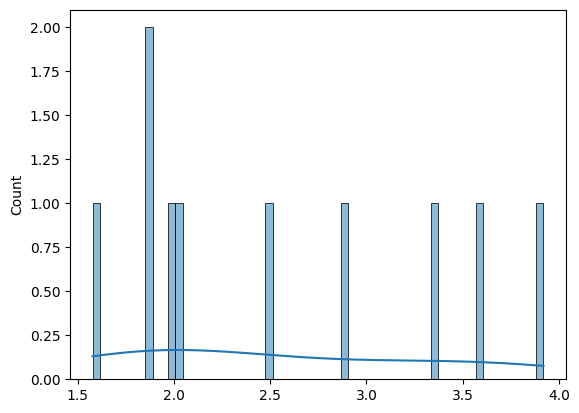

In [14]:
log_prob = -np.log(np.array(prob))

plot = sns.histplot(data=log_prob, bins=60, kde=True)
plot.figure.savefig("222.pdf")

# Compare data

### Create data list

In [40]:
data = make_data_list(base_type, subject_type, data_len=10000)
print(data[0:5])

Reading base data...: 100000it [00:01, 94693.31it/s]
Reading subject data...: 100%|███████████████████████████████████████████████| 10000/10000 [00:00<00:00, 107651.98it/s]

[{'sample': [0, 0, 0, 0, 0, 0, 6], 'base_prob': 1e-05, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 1, 5], 'base_prob': 0.00028, 'subject_prob': 0.0004}, {'sample': [0, 0, 0, 0, 0, 2, 4], 'base_prob': 0.0008, 'subject_prob': 0.0006}, {'sample': [0, 0, 0, 0, 0, 3, 3], 'base_prob': 0.00107, 'subject_prob': 0.0009}, {'sample': [0, 0, 0, 0, 0, 4, 2], 'base_prob': 0.00068, 'subject_prob': 0.0005}]


### Sort samples

In [41]:
data_collisions = [[] for _ in range(photons_num)]

for note in data:
    collisions_num = max(note['sample'])
    data_collisions[collisions_num - 1].append(note)

### Graphical representation

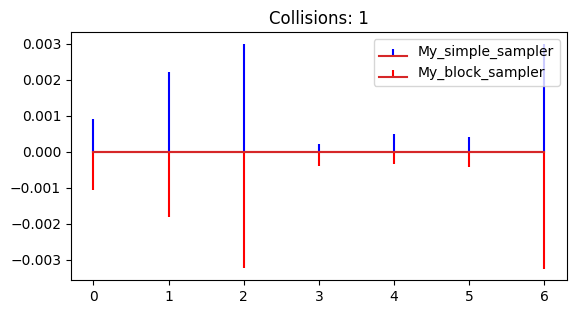

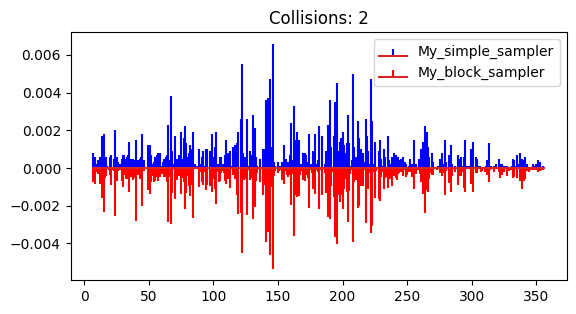

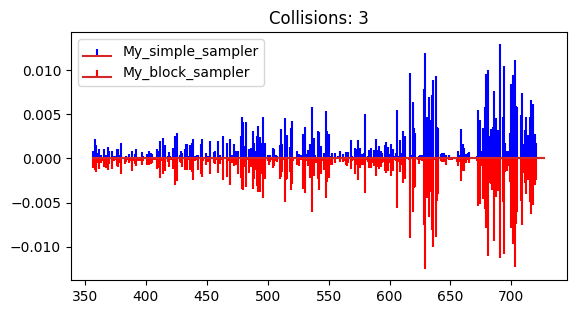

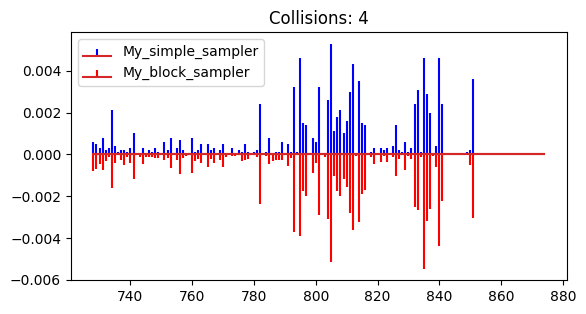

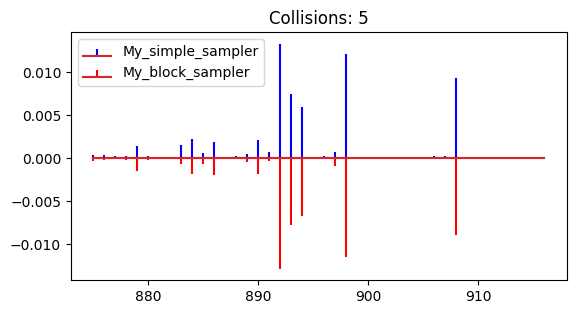

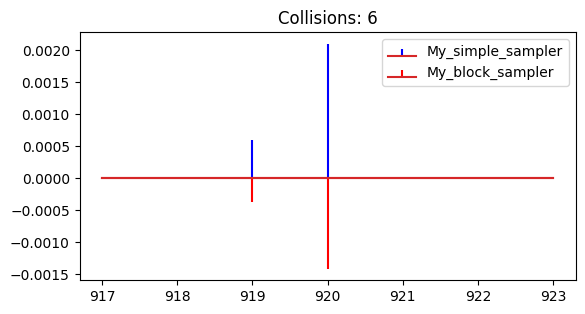

In [42]:
x_current = 0

for i in range(photons_num):
    if data_collisions[i] != []:
        fig, ax = plt.subplots()
        
        x = np.arange(x_current, x_current + len(data_collisions[i]), 1)
        x_current += len(data_collisions[i])

        y1 = [note['subject_prob'] for note in data_collisions[i]]
        y2 = [-note['base_prob'] for note in data_collisions[i]]


        ax.stem(x, y1, 'b', markerfmt='', label="My_simple_sampler")
        ax.stem(x, y2, 'r', markerfmt='', label="My_block_sampler")

        ratio = 0.5
        x_left, x_right = ax.get_xlim()
        y_low, y_high = ax.get_ylim()
        ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
        ax.legend()
        
        plt.title("Collisions: " + str(i+1))
        
        plt.show()


### Fidelity and TVD

In [43]:
fidelity = 0
tvd = 0

for note in data:
    fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
    tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
print('fidelity:', round(fidelity, 4))
print('tvd:', round(tvd, 4))

fidelity: 0.9867
tvd: 0.0935


# Block sampler convergence

In [27]:
sample_num_min = 1
sample_num_max = 2000
sample_step = 20
iter_num = 5
data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_1", "data"))

sample_num = range(sample_num_min, sample_num_max + sample_step, sample_step)

In [35]:
subject_type = 'Mazanik'

if subject_type == 'Mazanik_block':
    file_name = 'block_sample'
elif subject_type == 'Mazanik':
    file_name = 'sample'
else:
    file_name = 'samples'

fidelity_data = []
tvd_data = []
all_samples, data = define_data_list()
data = data_base_prob(data, all_samples, base_type, data_dir)

for data_len in tqdm(sample_num, desc="Reading_data"):
    fidelity_avg = 0
    tvd_avg = 0
    for i in range(iter_num):
        fidelity = 0
        tvd = 0

        subject_data_file_name = file_name + '_' + str(i+1) + '.txt'

        data = data_subject_prob(data, all_samples, subject_type, data_len, data_dir, disable_PB=True)
        for note in data:
            fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
            tvd += abs(note['base_prob'] - note['subject_prob']) / 2
        fidelity_avg += fidelity
        tvd_avg += tvd
    fidelity_avg = fidelity_avg / iter_num
    tvd_avg = tvd_avg / iter_num

    fidelity_data.append(fidelity_avg)
    tvd_data.append(tvd_avg)
    
if subject_type == 'Mazanik_block':
    fid_data_block = fidelity_data
    tvd_data_block = tvd_data
elif subject_type == 'Mazanik':
    fid_data_single = fidelity_data
    tvd_data_single = tvd_data
else:
    fid_data_an = fidelity_data
    tvd_data_an = tvd_data

Reading base data...: 462it [00:00, 115715.30it/s]
Reading_data: 100%|██████████████████████████████████████████████████████████████████| 101/101 [00:03<00:00, 28.78it/s]


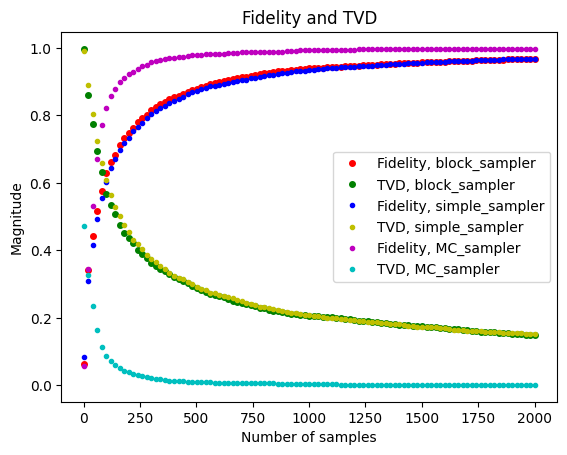

In [36]:
sample_num = np.array(sample_num)
fid_data_single = np.array(fid_data_single)
tvd_data_single = np.array(tvd_data_single)
fid_data_block = np.array(fid_data_block)
tvd_data_block = np.array(tvd_data_block)
fid_data_an = np.array(fid_data_an)
tvd_data_an = np.array(tvd_data_an)

plt.plot(sample_num, fid_data_single, 'ro', label='Fidelity, block_sampler', markersize=4)
plt.plot(sample_num, tvd_data_single, 'go', label='TVD, block_sampler', markersize=4)
plt.plot(sample_num, fid_data_block, 'bo', label='Fidelity, simple_sampler', markersize=3)
plt.plot(sample_num, tvd_data_block, 'yo', label='TVD, simple_sampler', markersize=3)
plt.plot(sample_num, fid_data_an, 'mo', label='Fidelity, MC_sampler', markersize=3)
plt.plot(sample_num, tvd_data_an, 'co', label='TVD, MC_sampler', markersize=3)
  
plt.xlabel("Number of samples")
plt.ylabel("Magnitude")
plt.title("Fidelity and TVD")
  
plt.legend(loc='right')
  
plt.savefig('samples/analysis_results/conv' + str(3) + '.pdf',  format = 'pdf')

y =  0.014929895824640617 *x +  0.4037539145351949


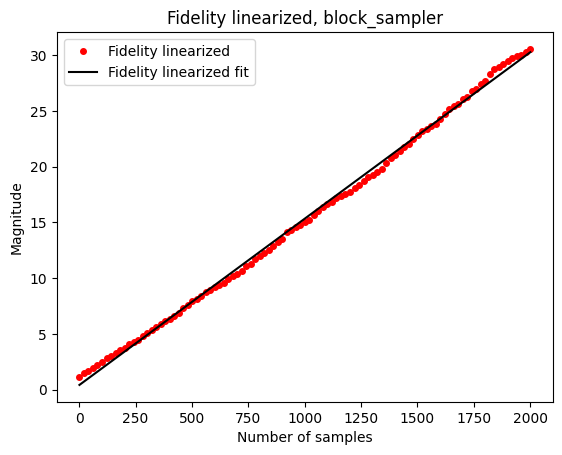

In [38]:
plt.xlabel("Number of samples")
plt.ylabel("Magnitude")
plt.title("Fidelity linearized, block_sampler")

plt.plot(sample_num, 1/(1-(fid_data_block)), 'ro', label='Fidelity linearized', markersize=4)
block_fit_coeff = np.polyfit(sample_num, 1/(1-fid_data_block), 1)
print('y = ', block_fit_coeff[0], '*x + ', block_fit_coeff[1])
block_fit = block_fit_coeff[1] + sample_num * block_fit_coeff[0]
plt.plot(sample_num, block_fit, 'k', label='Fidelity linearized fit', markersize=4)

plt.legend(loc='upper left')
plt.savefig('samples/analysis_results/conv_lin' + str(1) + '.pdf',  format = 'pdf')

y =  0.01799690866527586 *x +  -12.735291455434604


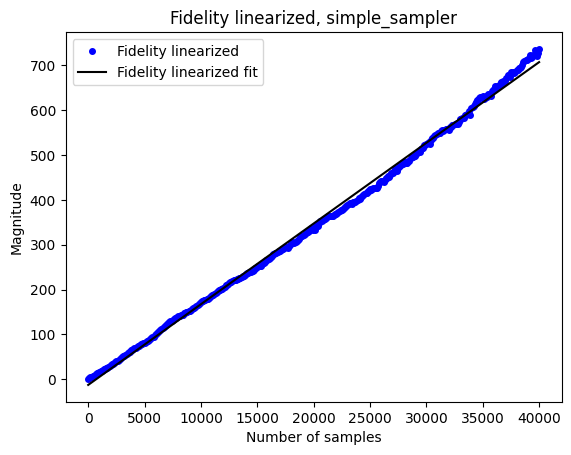

In [314]:
plt.xlabel("Number of samples")
plt.ylabel("Magnitude")
plt.title("Fidelity linearized, simple_sampler")

plt.plot(sample_num, 1/(1-fid_data_single), 'bo', label='Fidelity linearized', markersize=4)
single_fit_coeff = np.polyfit(sample_num, 1/(1-fid_data_single), 1)
print('y = ', single_fit_coeff[0], '*x + ', single_fit_coeff[1])
single_fit = single_fit_coeff[1] + sample_num * single_fit_coeff[0]
plt.plot(sample_num, single_fit, 'k', label='Fidelity linearized fit', markersize=4)

plt.legend(loc='upper left')
plt.savefig('samples/analysis_results/conv_lin' + str(2) + '.pdf',  format = 'pdf')

# Block sampler convergence robustness

In [17]:
sample_num_min = 1
sample_num_max = 1500
sample_step = 20
iter_num = 5
data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_2", "data"))

sample_num = range(sample_num_min, sample_num_max + sample_step, sample_step)

In [20]:
circuits_fid_data = []
circuits_tvd_data = []
circuits_num = 6

subject_type = 'Mazanik_block'
for j in range(circuits_num):
    fidelity_data = []
    tvd_data = []
    all_samples, data = define_data_list()
    base_data_file_name = 'ground_truth_' + str(j+1) + '.txt'
    data = data_base_prob(data, all_samples, base_type, data_dir)

    for data_len in tqdm(sample_num, desc="Reading_data"):
        fidelity_avg = 0
        tvd_avg = 0
        for i in range(iter_num):
            fidelity = 0
            tvd = 0

            subject_data_file_name = 'block_sample' + '_' + str(j+1) + str(i+1) + '.txt'

            data = data_subject_prob(data, all_samples, subject_type, data_len, data_dir, disable_PB=True)
            for note in data:
                fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
                tvd += abs(note['base_prob'] - note['subject_prob']) / 2
            fidelity_avg += fidelity
            tvd_avg += tvd
        fidelity_avg = fidelity_avg / iter_num
        tvd_avg = tvd_avg / iter_num

        fidelity_data.append(fidelity_avg)
        tvd_data.append(tvd_avg)
    
    circuits_fid_data.append(fidelity_data)
    circuits_tvd_data.append(tvd_data)

Reading base data...: 462it [00:00, 92658.56it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 37.23it/s]
Reading base data...: 462it [00:00, 81931.78it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 37.22it/s]
Reading base data...: 462it [00:00, 375754.98it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 37.66it/s]
Reading base data...: 462it [00:00, 674240.94it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:03<00:00, 21.14it/s]
Reading base data...: 462it [00:00, 36576.85it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 38.40it/s]
Reading base data...: 462it [00:00, 60319.64it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00

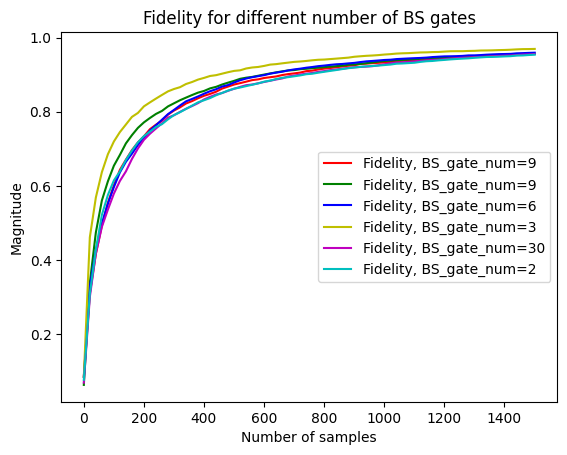

In [22]:
sample_num = np.array(sample_num)

plt.plot(sample_num, circuits_fid_data[0], 'r', label='Fidelity, BS_gate_num=9', markersize=3)
plt.plot(sample_num, circuits_fid_data[1], 'g', label='Fidelity, BS_gate_num=9', markersize=3)
plt.plot(sample_num, circuits_fid_data[2], 'b', label='Fidelity, BS_gate_num=6', markersize=3)
plt.plot(sample_num, circuits_fid_data[3], 'y', label='Fidelity, BS_gate_num=3', markersize=3)
plt.plot(sample_num, circuits_fid_data[4], 'm', label='Fidelity, BS_gate_num=30', markersize=3)
plt.plot(sample_num, circuits_fid_data[5], 'c', label='Fidelity, BS_gate_num=2', markersize=3)
  
plt.xlabel("Number of samples")
plt.ylabel("Magnitude")
plt.title("Fidelity for different number of BS gates")
  
plt.legend(loc='right')
  
plt.savefig('samples/analysis_results/conv' + str(7) + '.pdf',  format = 'pdf')

# Block sampler convergence comparison for different circuits

In [13]:
sample_num_min = 1
sample_num_max = 1500
sample_step = 20
iter_num = 5
data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_3", "data"))

sample_num = range(sample_num_min, sample_num_max + sample_step, sample_step)

In [15]:
circuits_fid_data = []
circuits_num = 3

subject_type = 'Mazanik'
for j in range(circuits_num):
    fidelity_data = []
    all_samples, data = define_data_list()
    base_data_file_name = 'ground_truth_' + str(j+1) + '.txt'
    data = data_base_prob(data, all_samples, base_type, data_dir)

    for data_len in tqdm(sample_num, desc="Reading_data"):
        fidelity_avg = 0
        for i in range(iter_num):
            fidelity = 0

            subject_data_file_name = 'block_sample' + '_' + str(j+1) + str(i+1) + '.txt'

            data = data_subject_prob(data, all_samples, subject_type, data_len, data_dir, disable_PB=True)
            for note in data:
                fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
            fidelity_avg += fidelity

        fidelity_avg = fidelity_avg / iter_num

        fidelity_data.append(fidelity_avg)
    
    circuits_fid_data.append(fidelity_data)

if subject_type == 'Mazanik_block':
    circuits_block_data = circuits_fid_data
elif subject_type == 'Mazanik':
    circuits_simple_data = circuits_fid_data
else:
    circuits_an_data = circuits_fid_data

Reading base data...: 462it [00:00, 223941.81it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 37.88it/s]
Reading base data...: 462it [00:00, 127610.70it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 35.68it/s]
Reading base data...: 462it [00:00, 56734.55it/s]
Reading_data: 100%|████████████████████████████████████████████████████████████████████| 76/76 [00:02<00:00, 37.27it/s]


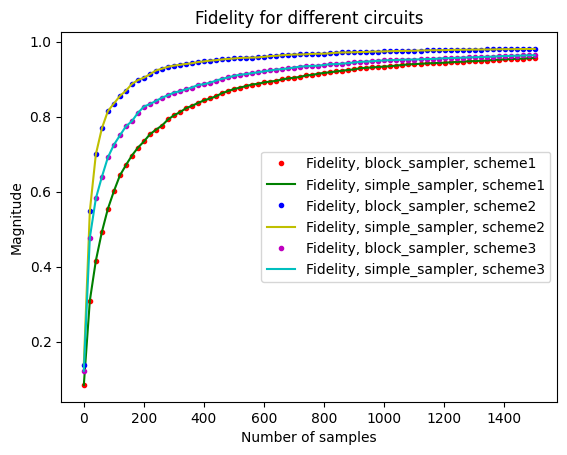

In [18]:
sample_num = np.array(sample_num)

plt.plot(sample_num, circuits_block_data[0], 'ro', label='Fidelity, block_sampler, scheme1', markersize=3)
plt.plot(sample_num, circuits_simple_data[0], 'g', label='Fidelity, simple_sampler, scheme1', markersize=3)

plt.plot(sample_num, circuits_block_data[1], 'bo', label='Fidelity, block_sampler, scheme2', markersize=3)
plt.plot(sample_num, circuits_simple_data[1], 'y', label='Fidelity, simple_sampler, scheme2', markersize=3)

plt.plot(sample_num, circuits_block_data[2], 'mo', label='Fidelity, block_sampler, scheme3', markersize=3)
plt.plot(sample_num, circuits_simple_data[2], 'c', label='Fidelity, simple_sampler, scheme3', markersize=3)
  
plt.xlabel("Number of samples")
plt.ylabel("Magnitude")
plt.title("Fidelity for different circuits")
  
plt.legend(loc='right')
  
plt.savefig('samples/analysis_results/conv' + str(10) + '.pdf',  format = 'pdf')

# Different input configurations

In [41]:
photons_num = 6
modes_num = 6
number_of_diff_configs = 47

data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_4", "data"))
subject_type = 'Mazanik_block'
base_type = 'Ground'

In [42]:
fidelity_list = []
tvd_list = []
for i in tqdm(range(number_of_diff_configs), desc="Reading...", disable=False):
    subject_data_file_name = 'block_sample_' + str(i+1) + '1.txt'
    base_data_file_name = 'ground_truth_' + str(i+1) + '.txt'
    
    data = make_data_list(base_type, subject_type, data_dir=data_dir, data_len=30000, disable_PB=True)
    
    data_collisions = [[] for _ in range(photons_num)]
    for note in data:
        collisions_num = max(note['sample'])
        data_collisions[collisions_num - 1].append(note)
    
    fidelity = 0
    tvd = 0
    for note in data:
        fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
        tvd += abs(note['base_prob'] - note['subject_prob']) / 2 
    
    fidelity_list.append(fidelity)
    tvd_list.append(tvd)

Reading...: 100%|██████████████████████████████████████████████████████████████████████| 47/47 [00:09<00:00,  4.95it/s]


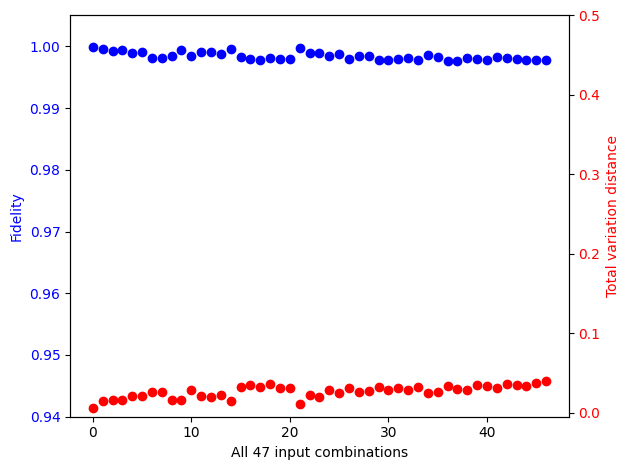

In [43]:
configs = np.arange(number_of_diff_configs)

fig, ax1 = plt.subplots()

ax1.set_xlabel('All 47 input combinations')
ax1.set_ylabel('Fidelity', color='blue')
ax1.plot(configs, fidelity_list, 'bo')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0.94, 1.005])

ax2 = ax1.twinx()

ax2.set_ylabel('Total variation distance', color='red')
ax2.plot(configs, tvd_list, 'ro')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([-0.005, 0.5])

fig.tight_layout() 
plt.savefig('samples/analysis_results/fid_tvd' + str(1) + '.pdf',  format = 'pdf')

In [44]:
print(fidelity_list)
print(tvd_list)

[0.9998993251256437, 0.9995818692499157, 0.9992608091372147, 0.9993659322191123, 0.9988820704927572, 0.9990952717213417, 0.9980430922141346, 0.9980375938541384, 0.9985012219725424, 0.999476944098413, 0.9984513998483644, 0.9990414170682161, 0.9991556935016612, 0.9987510448447048, 0.9995647577235857, 0.9982694674635135, 0.9980189866776549, 0.9977789310320543, 0.9980489177126258, 0.9980035268450803, 0.9978809522056242, 0.9997443400847401, 0.9988846300271148, 0.9988770903642027, 0.9984148337372554, 0.9987841583979742, 0.997890716758425, 0.9984437311152643, 0.9983704675309077, 0.997766173809967, 0.997712116538195, 0.9979854877364249, 0.9980555936887815, 0.9977998244631388, 0.9986250805162024, 0.9983119785050469, 0.9976711478806692, 0.9976845888224949, 0.998059058028734, 0.9979091170754806, 0.9977957307104214, 0.9983215384631057, 0.9980630904324215, 0.9979232206198937, 0.9977597648612008, 0.9977366279736408, 0.9978281321294683]
[0.005895999999999999, 0.014679500000000009, 0.01642900000000000

# Comparison of the SM-sempler and the BF-sempler

In [48]:
subject_type = 'Mazanik_block'
base_type = 'Mazanik'

subject_data_file_name = 'block_sample1.txt'
base_data_file_name = 'sample.txt'

photons_num = 6
modes_num = 6

data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_10", "data"))

In [49]:
data = make_data_list(base_type, subject_type, data_dir=data_dir, data_len=20000)

Reading base data...: 20000it [00:00, 182134.56it/s]
Reading subject data...: 100%|███████████████████████████████████████████████| 20000/20000 [00:00<00:00, 178380.45it/s]


In [50]:
data_collisions = [[] for _ in range(photons_num)]

for note in data:
    collisions_num = max(note['sample'])
    data_collisions[collisions_num - 1].append(note)

In [51]:
x_current = 0

for i in range(photons_num):
    if data_collisions[i] != []:
        
        x = np.arange(x_current, x_current + len(data_collisions[i]), 1)
        x_current += len(data_collisions[i])

        y1 = [note['subject_prob'] for note in data_collisions[i]]
        y2 = [-note['base_prob'] for note in data_collisions[i]]
        
        filename = 'wolfram_data_' + str(i) + '.txt'
        
        with open(os.path.join(data_dir, filename), 'w') as f_data:
            for index, element in enumerate(x):
                points = str(element) + ';' + str(y1[index]) + ';' + str(y2[index])
                print(points, file=f_data)

In [52]:
fidelity = 0
tvd = 0

for note in data:
    fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
    tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
print('fidelity:', round(fidelity, 4))
print('tvd:', round(tvd, 4))

fidelity: 0.7981
tvd: 0.3414


## Distribution of $-\log{(|perm{(A_S)}|^2)}$

In [44]:
photons_num = 6
modes_num = 7
init_config = [1 if i < photons_num else 0 for i in range(modes_num)]

sample_dir = os.path.abspath(os.path.join('..', "analysis", "exp_10", "data"))
scheme_dir = os.path.abspath(os.path.join('..', "analysis", "exp_10"))

subject_type = 'Mazanik_block'
base_type = 'None'

subject_data_file_name = 'block_sample_01.txt'

In [77]:
#data = make_data_list(base_type, subject_type, data_dir=sample_dir, data_len=50000)
#print(data)

def find_submatrix():
    def get_indices(vec):
        indices = []
        for i in range(modes_num):
            if vec[i] > 0:
                for j in range(vec[i]):
                    indices.append(i)
        return indices

    column_indices = get_indices(init_config)
    row_indices = get_indices(vec_out)

    return unitary[:, column_indices][row_indices]

with open(os.path.join(scheme_dir, "scheme_unitary.txt"), 'r') as f_unitary:
    unitary = np.empty((modes_num, modes_num), dtype=complex)
    for line_num, f_line in enumerate(f_unitary):
        f_line = f_line.strip()
        string = list(map(float, f_line.split('\t')))
        for i in range(0, 2 * modes_num, 2):
            item = complex(string[i], string[i + 1])
            unitary[line_num][int(i/2)] = item

prob = []
with open(os.path.join(sample_dir, "block_sample_851.txt"), 'r') as f_data:
    for item in tqdm(f_data, desc="Computing...", disable=False):
        item = item.strip()
        vec_out = sample_to_list(subject_type, item)
        norm = 1
        for num in init_config:
            norm *= np.math.factorial(num)
        for num in vec_out:
            norm *= np.math.factorial(num)
        prob.append(abs(perm(find_submatrix(), method="ryser")) ** 2 / norm)

'''
distinguishable_prob = []
with open(os.path.join(sample_dir, "distinguishable_sample1.txt"), 'r') as f_data:
    for item in tqdm(f_data, desc="Computing...", disable=False):
        item = item.strip()
        vec_out = sample_to_list(subject_type, item)
        norm = 1
        for num in init_config:
            norm *= np.math.factorial(num)
        for num in vec_out:
            norm *= np.math.factorial(num)
        distinguishable_prob.append(abs(perm(find_submatrix(), method="ryser")) ** 2 / norm)


simple_prob = []
with open(os.path.join(sample_dir, "sample.txt"), 'r') as f_data:
    for item in tqdm(f_data, desc="Computing...", disable=False):
        item = item.strip()
        vec_out = sample_to_list(subject_type, item)
        norm = 1
        for num in init_config:
            norm *= np.math.factorial(num)
        for num in vec_out:
            norm *= np.math.factorial(num)
        simple_prob.append(abs(perm(find_submatrix(), method="ryser")) ** 2 / norm)

'''

Computing...: 10000it [00:00, 39091.04it/s]


'\ndistinguishable_prob = []\nwith open(os.path.join(sample_dir, "distinguishable_sample1.txt"), \'r\') as f_data:\n    for item in tqdm(f_data, desc="Computing...", disable=False):\n        item = item.strip()\n        vec_out = sample_to_list(subject_type, item)\n        norm = 1\n        for num in init_config:\n            norm *= np.math.factorial(num)\n        for num in vec_out:\n            norm *= np.math.factorial(num)\n        distinguishable_prob.append(abs(perm(find_submatrix(), method="ryser")) ** 2 / norm)\n\n\nsimple_prob = []\nwith open(os.path.join(sample_dir, "sample.txt"), \'r\') as f_data:\n    for item in tqdm(f_data, desc="Computing...", disable=False):\n        item = item.strip()\n        vec_out = sample_to_list(subject_type, item)\n        norm = 1\n        for num in init_config:\n            norm *= np.math.factorial(num)\n        for num in vec_out:\n            norm *= np.math.factorial(num)\n        simple_prob.append(abs(perm(find_submatrix(), method="r

C:\Users\Aliaksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aliaksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aliaksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

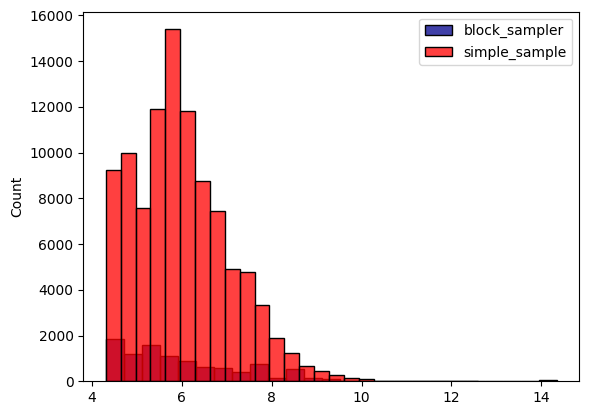

In [78]:
log_prob = -np.log(np.array(prob))
#log_distinguishable_prob = -np.log(np.array(distinguishable_prob))
log_simple_prob = -np.log(np.array(simple_prob))



with open(os.path.join(sample_dir, "wolfram_tsh_17.txt"), 'w') as f_out:
    for item in log_prob:
        print(item, file=f_out)
'''
with open(os.path.join(sample_dir, "wolfram_distinguishable_1.txt"), 'w') as f_out:
    for item in log_distinguishable_prob:
        print(item, file=f_out)
'''
'''
with open(os.path.join(sample_dir, "wolfram_sample.txt"), 'w') as f_out:
    for item in log_simple_prob:
        print(item, file=f_out)  

'''
bins_num = 25

plot = sns.histplot(data=log_prob, bins=bins_num, color="darkblue", kde=False, label="block_sampler")
#plot = sns.histplot(data=log_distinguishable_prob, bins=bins_num, color="yellow", kde=False, label="distinguishable_sampler")
plot = sns.histplot(data=log_simple_prob, bins=bins_num, color="red", kde=False, label="simple_sample")


plt.legend()
plt.show()

# Comparison of the BF-sempler and the SF-sempler

In [40]:
subject_type = 'Mazanik'
base_type = 'SF'

subject_data_file_name = 'sample.txt'
base_data_file_name = 'sf_sample1.txt'

photons_num = 3
modes_num = 4

data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_8", "data"))

In [41]:
data = make_data_list(base_type, subject_type, data_dir=data_dir, data_len=2000)
print(data)

Reading base data...: 2000it [00:00, 401023.42it/s]
Reading subject data...: 100%|█████████████████████████████████| 2000/2000 [00:00<00:00, 400946.75it/s]

[{'sample': [0, 0, 0, 3], 'base_prob': 0.0008, 'subject_prob': 0.0}, {'sample': [0, 0, 1, 2], 'base_prob': 0.0049, 'subject_prob': 0.005}, {'sample': [0, 0, 2, 1], 'base_prob': 0.0305, 'subject_prob': 0.033}, {'sample': [0, 0, 3, 0], 'base_prob': 0.0381, 'subject_prob': 0.0425}, {'sample': [0, 1, 0, 2], 'base_prob': 0.0355, 'subject_prob': 0.034}, {'sample': [0, 1, 1, 1], 'base_prob': 0.0578, 'subject_prob': 0.057}, {'sample': [0, 1, 2, 0], 'base_prob': 0.0078, 'subject_prob': 0.0055}, {'sample': [0, 2, 0, 1], 'base_prob': 0.0592, 'subject_prob': 0.055}, {'sample': [0, 2, 1, 0], 'base_prob': 0.1959, 'subject_prob': 0.203}, {'sample': [0, 3, 0, 0], 'base_prob': 0.0153, 'subject_prob': 0.0155}, {'sample': [1, 0, 0, 2], 'base_prob': 0.014, 'subject_prob': 0.0125}, {'sample': [1, 0, 1, 1], 'base_prob': 0.0634, 'subject_prob': 0.0645}, {'sample': [1, 0, 2, 0], 'base_prob': 0.0979, 'subject_prob': 0.089}, {'sample': [1, 1, 0, 1], 'base_prob': 0.0099, 'subject_prob': 0.009}, {'sample': [1, 1,

In [42]:
data_collisions = [[] for _ in range(photons_num)]

for note in data:
    collisions_num = max(note['sample'])
    data_collisions[collisions_num - 1].append(note)

In [43]:
x_current = 0

for i in range(photons_num):
    if data_collisions[i] != []:
        
        x = np.arange(x_current, x_current + len(data_collisions[i]), 1)
        x_current += len(data_collisions[i])

        y1 = [note['subject_prob'] for note in data_collisions[i]]
        y2 = [-note['base_prob'] for note in data_collisions[i]]
        
        filename = 'wolfram_data_' + str(i) + '.txt'
        
        with open(os.path.join(data_dir, filename), 'w') as f_data:
            for index, element in enumerate(x):
                points = str(element) + ';' + str(y1[index]) + ';' + str(y2[index])
                print(points, file=f_data)

In [44]:
fidelity = 0
tvd = 0

for note in data:
    fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
    tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
print('fidelity:', round(fidelity, 4))
print('tvd:', round(tvd, 4))

fidelity: 0.9989
tvd: 0.0252


# Fidelity and TVD to Threshold

In [99]:
subject_type = 'Mazanik_block'
base_type = 'Ground'

base_data_file_name = 'ground_truth.txt'

photons_num = 6
modes_num = 7

data_dir = os.path.abspath(os.path.join('..', "analysis", "exp_10", "data"))

In [100]:
fidelity_list = []
TVD_list = []

In [101]:
for i in range(0, 90, 5):
    subject_data_file_name = 'block_sample_' + str(i) + '1.txt' 

    data = make_data_list(base_type, subject_type, data_dir=data_dir, data_len=10000)

    data_collisions = [[] for _ in range(photons_num)]

    for note in data:
        collisions_num = max(note['sample'])
        data_collisions[collisions_num - 1].append(note)
    
    fidelity = 0
    tvd = 0

    for note in data:
        fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
        tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
    fidelity_list.append(fidelity)
    TVD_list.append(tvd)
    
    print("\n\ni = ", i)
    print('fidelity:', round(fidelity, 4))
    print('tvd:', round(tvd, 4))

Reading base data...: 924it [00:00, 80696.64it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 83588.17it/s]




i =  0
fidelity: 0.9876
tvd: 0.0881


Reading base data...: 924it [00:00, 53393.08it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 87773.57it/s]




i =  5
fidelity: 0.9859
tvd: 0.0952


Reading base data...: 924it [00:00, 58117.94it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 91524.53it/s]




i =  10
fidelity: 0.982
tvd: 0.108


Reading base data...: 924it [00:00, ?it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 84215.53it/s]




i =  15
fidelity: 0.9741
tvd: 0.1281


Reading base data...: 924it [00:00, 127476.38it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 87284.59it/s]




i =  20
fidelity: 0.9583
tvd: 0.1617


Reading base data...: 924it [00:00, 90368.35it/s]
Reading subject data...: 100%|███████████████████████████████████████████████| 10000/10000 [00:00<00:00, 104377.20it/s]




i =  25
fidelity: 0.9363
tvd: 0.1844


Reading base data...: 924it [00:00, 170653.32it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 89541.14it/s]




i =  30
fidelity: 0.9153
tvd: 0.2227


Reading base data...: 924it [00:00, 92638.63it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 90592.85it/s]




i =  35
fidelity: 0.9011
tvd: 0.2407


Reading base data...: 924it [00:00, ?it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 88767.40it/s]




i =  40
fidelity: 0.892
tvd: 0.2568


Reading base data...: 924it [00:00, 94309.07it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 86451.97it/s]




i =  45
fidelity: 0.8642
tvd: 0.2981


Reading base data...: 924it [00:00, 45215.28it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 85257.19it/s]




i =  50
fidelity: 0.849
tvd: 0.3091


Reading base data...: 924it [00:00, 51326.18it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 87392.08it/s]




i =  55
fidelity: 0.8247
tvd: 0.3429


Reading base data...: 924it [00:00, 44923.86it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 87275.51it/s]




i =  60
fidelity: 0.815
tvd: 0.3559


Reading base data...: 924it [00:00, 47478.61it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 90524.61it/s]




i =  65
fidelity: 0.7846
tvd: 0.3839


Reading base data...: 924it [00:00, 331384.09it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 87505.85it/s]




i =  70
fidelity: 0.749
tvd: 0.4254


Reading base data...: 924it [00:00, 50021.77it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 88256.36it/s]




i =  75
fidelity: 0.7182
tvd: 0.4653


Reading base data...: 924it [00:00, 58814.72it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 88718.39it/s]




i =  80
fidelity: 0.6922
tvd: 0.4824


Reading base data...: 924it [00:00, 68077.87it/s]
Reading subject data...: 100%|████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 89788.99it/s]



i =  85
fidelity: 0.6898
tvd: 0.486


In [102]:
with open(os.path.join(sample_dir, "wolfram_fidelity.txt"), 'w') as f_out:
    for item in fidelity_list:
        print(item, file=f_out)  

with open(os.path.join(sample_dir, "wolfram_tvd.txt"), 'w') as f_out:
    for item in TVD_list:
        print(item, file=f_out)  

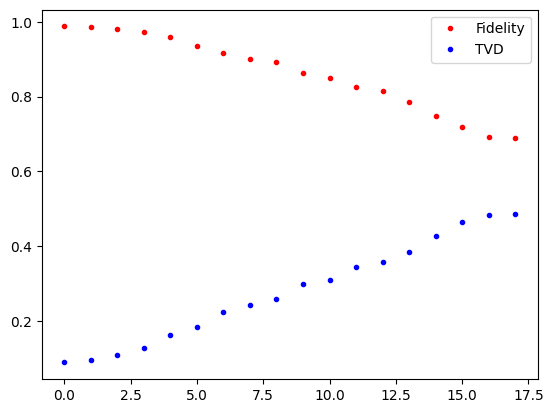

In [110]:
plt.plot(fidelity_list, 'ro', label='Fidelity', markersize=3)
plt.plot(TVD_list, 'bo', label='TVD', markersize=3)
plt.legend()